In [118]:
from pandas_datareader import data
import pandas as pd

from datetime import datetime
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [119]:
# 종목 코드
tickers = ["2317.TW"]

In [120]:
data_source = "yahoo"

start_date = datetime(2016,1,1)
end_date = datetime(2020,1,20)

In [121]:
AAPL = data.DataReader(tickers[0],data_source,start_date,end_date)

In [122]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,92.272697,89.318199,92.272697,89.772697,30756880.0,78.508644
2016-01-05,91.250000,89.545403,89.772697,89.886398,26388560.0,78.608078
2016-01-06,89.886398,87.840897,88.977303,89.772697,37337520.0,78.508644
2016-01-07,89.204597,87.500000,88.068199,88.977303,35362800.0,77.813049
2016-01-08,88.977303,87.727303,87.727303,88.636398,24209680.0,77.514908
...,...,...,...,...,...,...
2020-01-14,90.099998,89.599998,90.000000,90.000000,18618838.0,90.000000
2020-01-15,90.300003,89.500000,90.000000,89.900002,23798041.0,89.900002
2020-01-16,90.199997,89.400002,89.800003,90.000000,19281565.0,90.000000


In [123]:
AAPL.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20'],
              dtype='datetime64[ns]', name='Date', length=985, freq=None)

In [108]:
tickerList=['AAPL','MS']
# vars => ticker문자열을 변수로 치환
for i in range(0,len(tickerList)):
    vars()[tickerList[i]]=data.DataReader(tickerList[i],data_source,start_date,end_date)

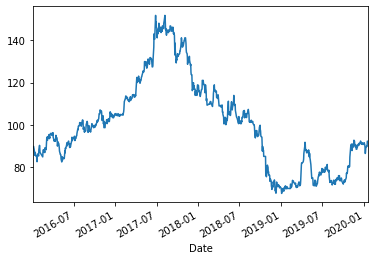

In [124]:
AAPL["Close"].plot()

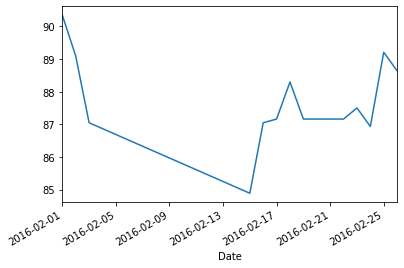

In [125]:
AAPL["2016-02"]["Close"].plot()

In [126]:
AAPL["2016-01-01":"2016-06-30"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,92.272697,89.318199,92.272697,89.772697,30756880.0,78.508644
2016-01-05,91.250000,89.545403,89.772697,89.886398,26388560.0,78.608078
2016-01-06,89.886398,87.840897,88.977303,89.772697,37337520.0,78.508644
2016-01-07,89.204597,87.500000,88.068199,88.977303,35362800.0,77.813049
2016-01-08,88.977303,87.727303,87.727303,88.636398,24209680.0,77.514908
...,...,...,...,...,...,...
2016-06-24,94.545403,91.590897,94.545403,92.613602,54957760.0,80.993080
2016-06-27,93.295403,91.818199,92.045403,93.181801,17676560.0,81.489990
2016-06-28,93.750000,91.818199,92.272697,93.750000,3887840.0,81.986900


In [54]:
# 날씨 마지막 등 확인 필요!!
AAPL["2016-01-01":"2016-06-31"]

DateParseError: day is out of range for month

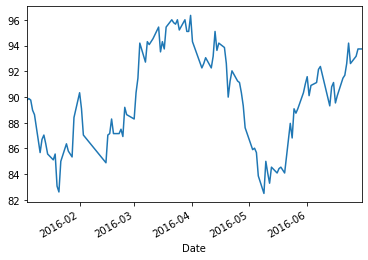

In [127]:
# 상반기 
AAPL[:"2016-06-30"]["Close"].plot()

In [128]:
AAPL['MA_5']=AAPL['Close'].rolling(window=5).mean()
AAPL['MA_20']=AAPL['Close'].rolling(window=20).mean()
AAPL['MA_60']=AAPL['Close'].rolling(window=60).mean()
AAPL['MA_120']=AAPL['Close'].rolling(window=120).mean()

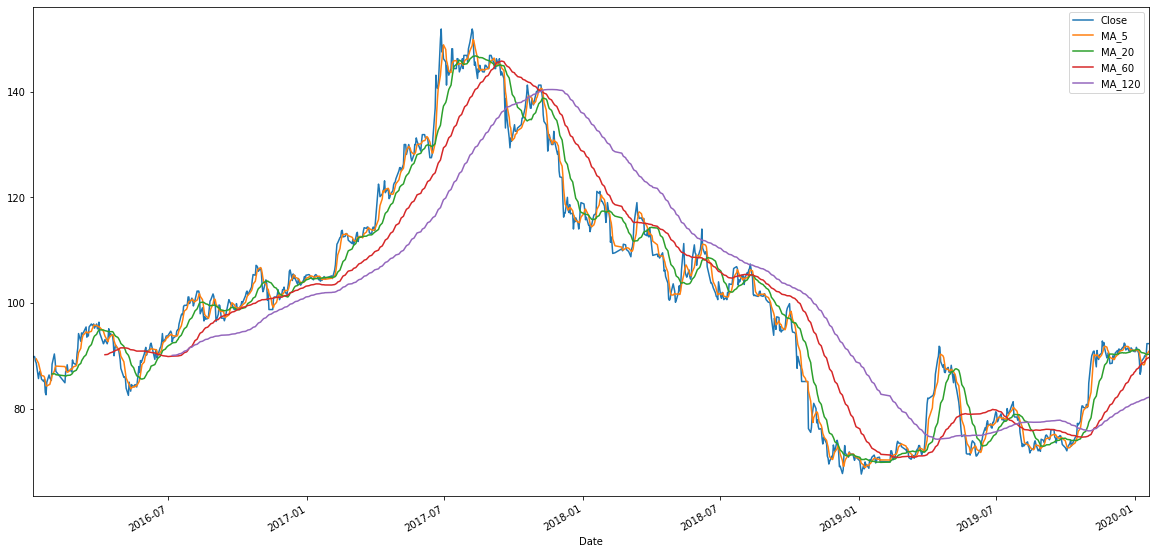

In [129]:
AAPL[["Close","MA_5","MA_20","MA_60","MA_120"]].plot(figsize=(20,10))

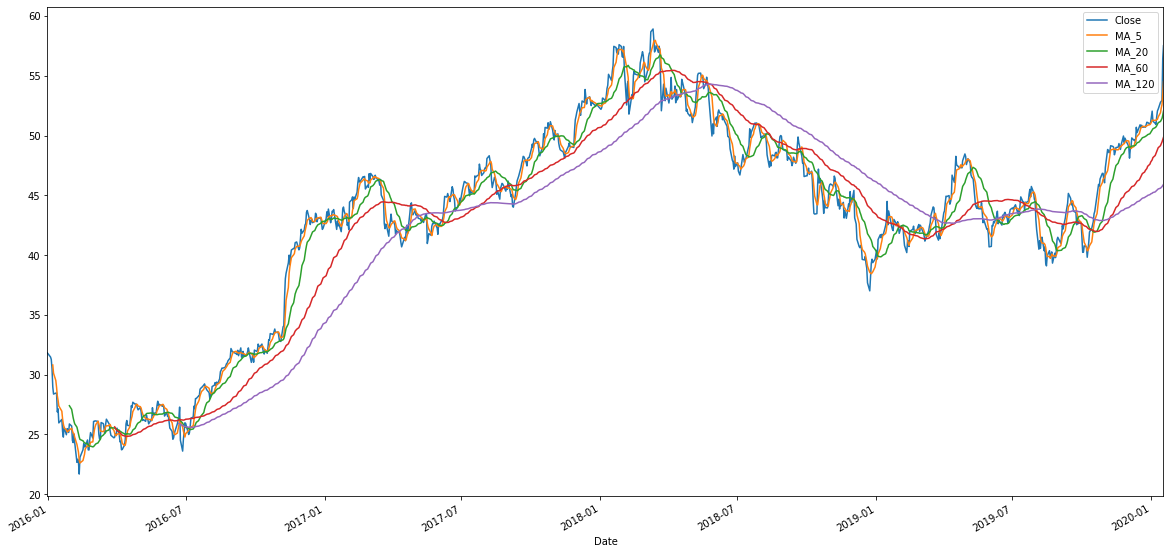

In [131]:
MS['MA_5']=MS['Close'].rolling(window=5).mean()
MS['MA_20']=MS['Close'].rolling(window=20).mean()
MS['MA_60']=MS['Close'].rolling(window=60).mean()
MS['MA_120']=MS['Close'].rolling(window=120).mean()
MS[["Close","MA_5","MA_20","MA_60","MA_120"]].plot(figsize=(20,10))

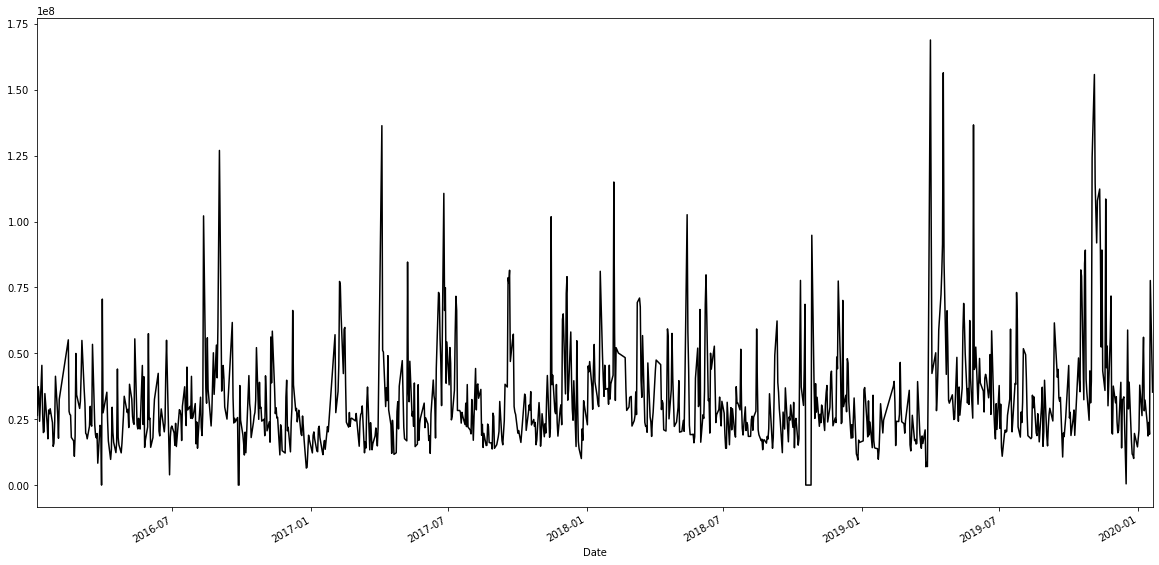

In [132]:
AAPL["Volume"].plot(figsize=(20,10),style='black')

In [133]:
# 골든크로스 : 단기 변동선이 장기변동선 위로 올라가는짖점

In [135]:
# AAPL[]>0
AAPL["dif"]=AAPL['MA_5']-AAPL['MA_60']
AAPL["dif_1day_before"]=AAPL['dif'].shift(1)
# 시프트 : 디퍼런스 값을 밀어줌

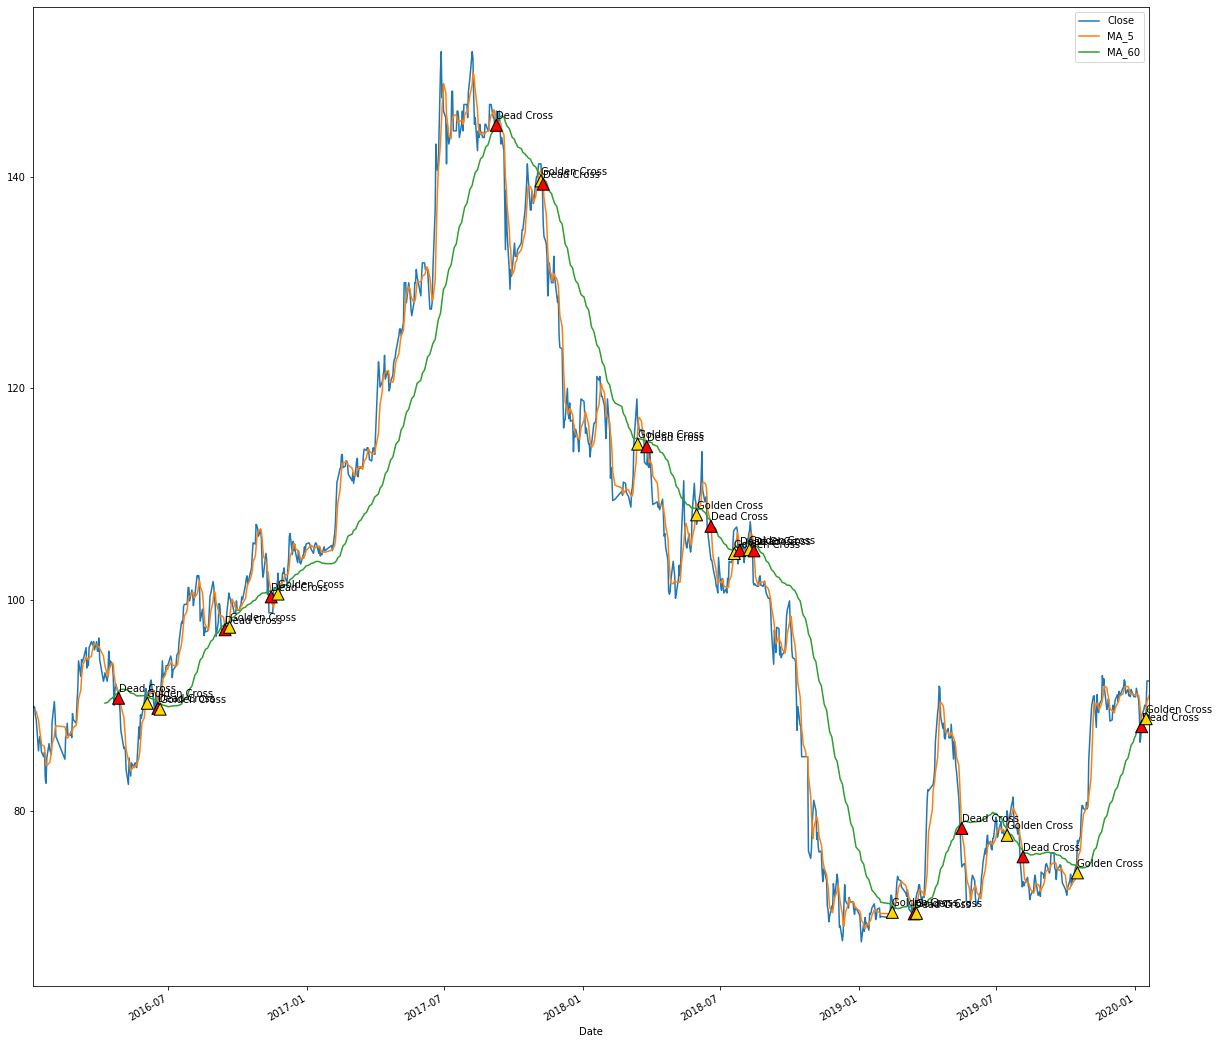

In [136]:
plt1 = AAPL[["Close","MA_5","MA_60"]].plot(figsize=(20,20))
for index, vals in AAPL['dif'].iteritems():
    now_val = AAPL.at[index,'dif']
    pre_val = AAPL.at[index,'dif_1day_before']
    if(now_val*pre_val<0)&(now_val>0):
        plt1.annotate('Golden Cross',fontsize=10,xy=(index,AAPL["MA_60"][index]),arrowprops=dict(facecolor="gold",linewidth=1))
    elif(now_val*pre_val<0)&(now_val<0):
        plt1.annotate('Dead Cross',fontsize=10,xy=(index,AAPL["MA_60"][index]),arrowprops=dict(facecolor="red",linewidth=1))

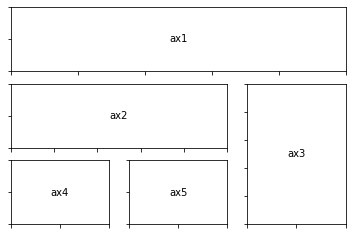

In [137]:
import matplotlib.pyplot as plt


def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

annotate_axes(fig)

plt.show()

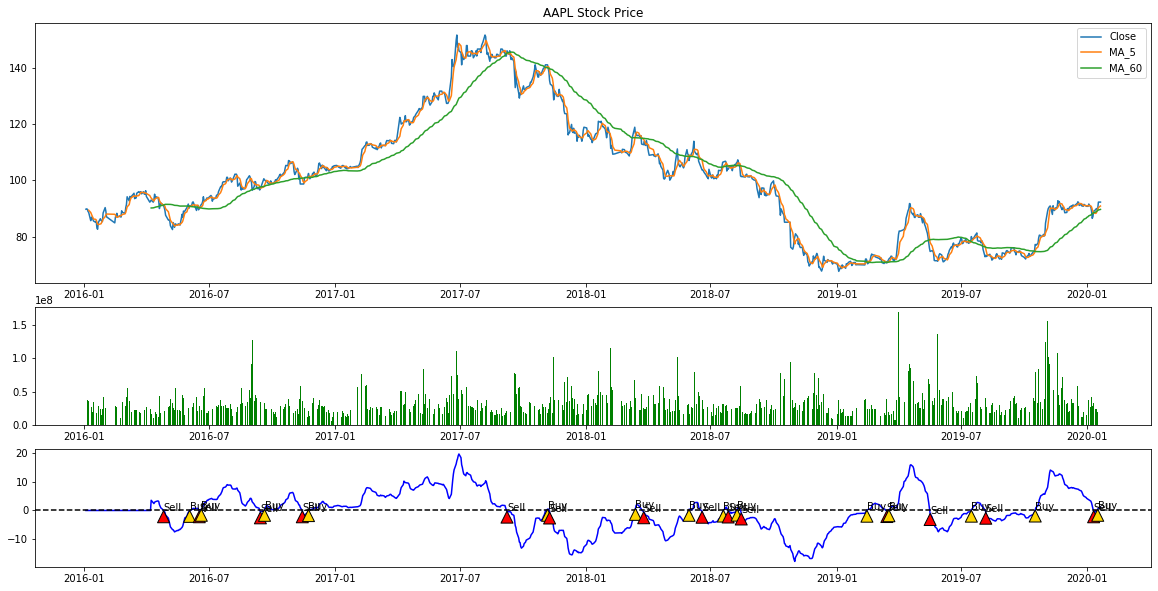

In [138]:
fig = plt.figure(figsize=(20,10))
pricechartplt = plt.subplot2grid((4, 1), (0, 0), rowspan=2)
pricechartplt.plot(AAPL.index,AAPL['Close'],label='Close')
pricechartplt.plot(AAPL.index,AAPL['MA_5'],label='MA_5')
pricechartplt.plot(AAPL.index,AAPL['MA_60'],label='MA_60')
plt.title("AAPL Stock Price")
plt.legend(loc='best')

volchart = plt.subplot2grid((4, 1), (2, 0), rowspan=1)
volchart.bar(AAPL.index,AAPL['Volume'],color='green')

sigchart = plt.subplot2grid((4, 1), (3, 0), rowspan=1)
sigchart.plot(AAPL.index,AAPL['dif'].fillna(0),color='blue')
plt.axhline(y=0,linestyle="--", color="black")

for index, vals in AAPL['dif'].iteritems():
    now_val = AAPL.at[index,'dif']
    pre_val = AAPL.at[index,'dif_1day_before']
    if(now_val*pre_val<0)&(now_val>0):
        sigchart.annotate('Buy',fontsize=10,xy=(index,AAPL["dif"][index]),arrowprops=dict(facecolor="gold",linewidth=1))
    elif(now_val*pre_val<0)&(now_val<0):
        sigchart.annotate('Sell',fontsize=10,xy=(index,AAPL["dif"][index]),arrowprops=dict(facecolor="red",linewidth=1))
        